## Logistic regression model
This notebook develops the code for building a Logistic Regression model

In [ ]:
#Library imports
import numpy as np # for vector / matrix operations
import pandas as pd # for data manipulation
import seaborn as sns # For plots


# Procure the data
We are going to use a diabetes related dataset for this exercise.
This dataset is hosted by Kaggle. The data description is located in the URL (https://www.kaggle.com/datasets/mathchi/diabetes-data-set)

Log in to Kaggle with your personal Google account and you can download tha zip file conagining the dataset. Unzip the file and save the csv file inside it to your local directory.


# Tips to access data from your Google drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#root_dir = "/content/gdrive/MyDrive/"
indir = '/content/gdrive/MyDrive/Colab Notebooks/MLcourse/MLdata/'
infile = indir + 'diabetes.csv'

Mounted at /content/gdrive


#Load the data from csv file

In [ ]:
# Import data from csv file using read_csv() function from pandas package
# The output df_diabetes is a Pandas dataframe object
df_diabetes = pd.read_csv(infile)

In [ ]:
# Manually view a few records of the data
'''
Use .sample(3) to see randomly seleted 3 records
Use .head(3) to see first 3 records
Use .tail(3) to see last 3 records
'''
df_diabetes.sample(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
316,3,99,80,11,64,19.3,0.284,30,0
121,6,111,64,39,0,34.2,0.260,24,0


In [ ]:
'''
use .describe() to see sample statistics of the numeric columns
'''
df_diabetes.describe().round(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.000
mean,3.8451,120.8945,69.1055,20.5365,79.7995,31.9926,0.4719,33.2409,0.349
std,3.3696,31.9726,19.3558,15.9522,115.2440,7.8842,0.3313,11.7602,0.477
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0780,21.0000,0.000
25%,1.0000,99.0000,62.0000,0.0000,0.0000,27.3000,0.2438,24.0000,0.000
50%,3.0000,117.0000,72.0000,23.0000,30.5000,32.0000,0.3725,29.0000,0.000
75%,6.0000,140.2500,80.0000,32.0000,127.2500,36.6000,0.6262,41.0000,1.000
max,17.0000,199.0000,122.0000,99.0000,846.0000,67.1000,2.4200,81.0000,1.000


# Build Logistic regression model


In [ ]:
from sklearn.linear_model import LogisticRegression


Split the data into train and test set. BUild the model on training set, evaluate the model on test set.

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_diabetes, test_size=0.33, random_state = 42)

In [ ]:
print (f"Size of training set : {df_train.shape[0]} rows , {df_train.shape[1]} columns")
print (f"Size of test set : {df_test.shape[0]} rows , {df_test.shape[1]} columns")

Size of training set : 514 rows , 9 columns
Size of test set : 254 rows , 9 columns


Separate out X and Y from train a nd test data. This is required for downstream functions that build the model.

In [ ]:
x_train = df_train.loc[:, df_train.columns != 'Outcome']
y_train = df_train.Outcome
x_test = df_test.loc[:, df_test.columns != 'Outcome']
y_test = df_test.Outcome

In [ ]:
y_train.head(3)

464    0
223    0
393    0
Name: Outcome, dtype: int64

Start building Logistic regression model on the training data

In [ ]:

# Initialize the logistic regression model object
LRmodel = LogisticRegression(solver='liblinear')
# Train it with training data
LRmodel.fit(x_train, y_train)


LogisticRegression(solver='liblinear')

Next we will study the quality of the fitted model. The general method to evaluate performance is to predict the Y variable (Outcome) using the fitted model and then compare it with the 'true' value of the Y variable. Note that this comparison can be done on the training data or on the test data. We will present the results for both.

However, keep in mind that model performance on test data is the true test of the model. Since the model is trained and optimized on the training data, its performance on the traininbg data itself is unrealistically optimistic.

# Model performace on training data itself

In [ ]:
# Predict Y values of trauining data
y_train_pred = LRmodel.predict(x_train)

The very first thing we look at, after fitting a model is to studt the classification report. It is the overall summary of the performace of the model. This report tells us about the precision, recall, F1 score of the model.

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_train, y_train_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.90      0.84       332
   with diabetes       0.75      0.55      0.64       182

        accuracy                           0.78       514
       macro avg       0.77      0.73      0.74       514
    weighted avg       0.78      0.78      0.77       514



In [ ]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_diabetes', 'predicted_diabetes']
cnf_matrix.index = ['true_no_diabetes', 'true_diabetes']
cnf_matrix

,predicted_no_diabetes,predicted_diabetes
true_no_diabetes,299,33
true_diabetes,81,101


#Model performance on test data

In [ ]:
# Predict Y values of trauining data
y_test_pred = LRmodel.predict(x_test)
target_names = ['without diabetes', 'with diabetes']
print('\n------------\n'+
      'Classification report on test data' +
      '\n------------\n')
print(classification_report(y_test, y_test_pred, target_names=target_names))

#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_diabetes', 'predicted_diabetes']
cnf_matrix.index = ['true_no_diabetes', 'true_diabetes']

print('\n------------\n'+
      'Confusion matrix on test data' +
      '\n------------\n')

print(cnf_matrix)


------------
Classification report on test data
------------

                  precision    recall  f1-score   support

without diabetes       0.81      0.85      0.83       168
   with diabetes       0.67      0.62      0.64        86

        accuracy                           0.77       254
       macro avg       0.74      0.73      0.74       254
    weighted avg       0.76      0.77      0.77       254


------------
Confusion matrix on test data
------------

                  predicted_no_diabetes  predicted_diabetes
true_no_diabetes                    142                  26
true_diabetes                        33                  53


# Interpretation of the metrics in classification report

Reference: Medium [article](https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f]) explaining the details of the metrics in the classification report output.

# Advanced evaluation metrics: ROC curve, P-R curve
The model actually predicts class probabilities which are numbers between 0 and 1. We need to use a *cutoff* to convert the class probabilities to binary predictions. This is done using the rule

```
IF predicted prob. is > cutoff THEN predicted_class = 1
  ELSE predicted_class = 0
```
All the metrics we saw so far (precision, recall, F1, confusion metrics) are based on the cutoff of 0.5, the exact midpoint of the [0-1] range. However 0.5 may not be the best cutoff for our data. The next section talks about how to choose optimal cutoff for our data.  

## ROC Curve (Receiver Operating Curve), AUC (Area Under the Curve)


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score


In [ ]:

# predict probabilities
y_train_prob = LRmodel.predict_proba(x_train)
y_train_prob = y_train_prob[:,1]

# calculate false positive and true positive rates
# these numbers are used to plot roc curve
fpr, tpr, _ = roc_curve(y_train, y_train_prob)
# calculate roc auc
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_train, y_train_prob)


0.8450450152257382


Next, we plot ROC curve on traing data.

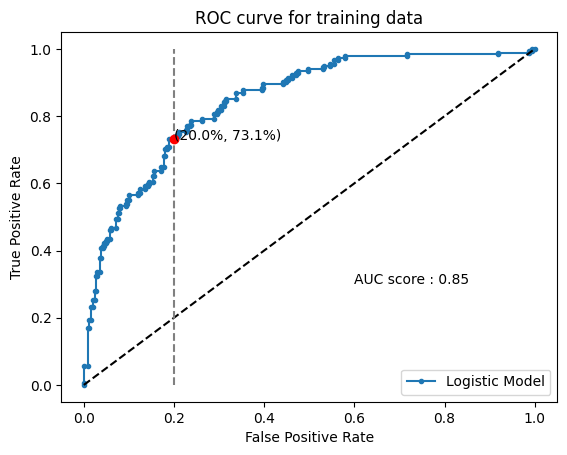

In [ ]:
from matplotlib import pyplot

# plot model roc curve on test data
pyplot.plot(fpr, tpr, marker='.', label='Logistic Model')
# red dashed line is y=x line.
# larger the gap between this line and ROC curve, better is the model
pyplot.plot([0,1], [0,1], linestyle='--', color='black' )

# Highest TPR we can get if we are ready to tolerate 20% FPR
fpr_bench = 0.2
pyplot.plot([fpr_bench,fpr_bench], [0,1], linestyle='--', color='grey' )
# find highest TPR for 20% FPR
max_tpr = max(tpr[fpr<=0.2])
pyplot.plot([fpr_bench], [max_tpr], marker = 'o',color='red' )
anno_str = "(" + str(np.round(fpr_bench*100, 0)) + \
          "%, " + \
          str(np.round(max_tpr*100 ,1)) + \
          "%)"
pyplot.text(fpr_bench, max_tpr, anno_str)

# Report AUC score
auc_str = "AUC score : " + str(np.round(roc_auc_train, 2))
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for training data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

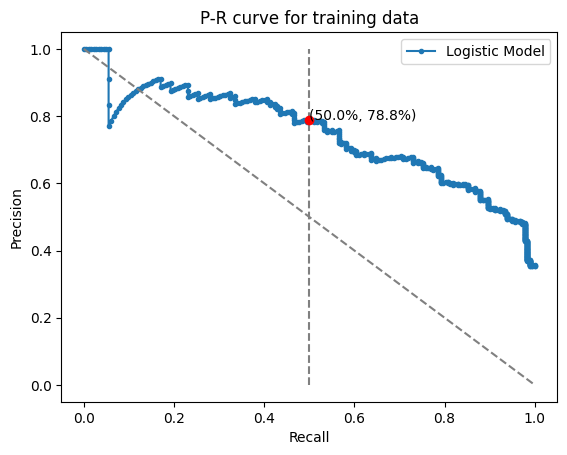

In [ ]:
# plot precision-recall curve on test data
pyplot.plot(recall, precision, marker='.', label='Logistic Model')
# red dashed line is y=x line.
# larger the gap between this line and ROC curve, better is the model
pyplot.plot([0,1], [1,0], linestyle='--', color='grey' )

# Highest precision we can get if we want recall to be 50% of higher
recall_bench = 0.5
pyplot.plot([recall_bench, recall_bench], [0,1], linestyle='--', color='grey' )

# find highest TPR for 20% FPR
max_prec = max(precision[recall>=recall_bench])
pyplot.plot([recall_bench], [max_prec], marker = 'o',color='red' )
anno_str = "(" + str(np.round(recall_bench*100, 0)) + \
          "%, " + \
          str(np.round(max_prec*100 ,1)) + \
          "%)"
pyplot.text(recall_bench, max_prec, anno_str)

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('P-R curve for training data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Comparing the performance on test vs training data


In [ ]:
dict_eval = {}
for dset in ['train', 'test']:
  # predict probabilities
  if (dset=='train'):
      x,y = x_train, y_train
  else:
      x,y = x_test, y_test

  y_prob = LRmodel.predict_proba(x)
  y_prob = y_prob[:, 1]

  # calculate false positive and true positive rates
  # these numbers are used to plot roc curve
  fpr, tpr, _ = roc_curve(y, y_prob)
  # calculate roc auc
  roc_auc = roc_auc_score(y, y_prob)

  # calculate precision-recall curve
  precision, recall, _ = precision_recall_curve(y, y_prob)
  pr_auc = average_precision_score(y, y_prob)

  dict_eval[dset] = {'fpr':fpr, 'tpr':tpr, 'roc_auc':roc_auc,
                     'prec':precision, 'recall':recall, 'pr_auc':pr_auc
                     }



Text(0.5, 1.0, 'ROC curve for training and test data')

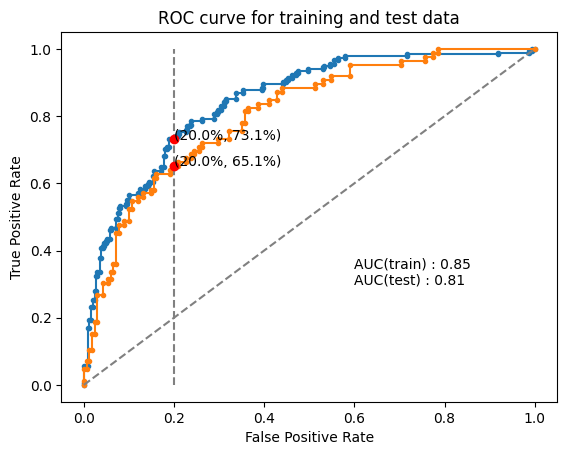

In [ ]:
# plot model roc curve on test data
pyplot.plot(dict_eval['train']['fpr'], dict_eval['train']['tpr'],
            marker='.', label='Train set')
pyplot.plot(dict_eval['test']['fpr'], dict_eval['test']['tpr'],
            marker='.', label='Test set')

# y=x line.
pyplot.plot([0,1], [0,1], linestyle='--', color='grey' )

# Highest TPR we can get if we are ready to tolerate 20% FPR
fpr_thresh = 0.2
pyplot.plot([fpr_thresh,fpr_thresh], [0,1], linestyle='--', color='grey' )
anno_list = {}

for dset in ['train', 'test']:
  # find highest TPR for 20% FPR
  max_tpr = max(dict_eval[dset]['tpr'][dict_eval[dset]['fpr'] <= fpr_thresh])
  pyplot.plot([fpr_thresh], [max_tpr], marker = 'o',color='red' )
  anno_str = "(" + str(np.round(fpr_thresh*100, 0)) + \
            "%, " + \
            str(np.round(max_tpr*100 ,1)) + \
            "%)"
  pyplot.text(fpr_thresh, max_tpr, anno_str)

  # Report AUC score
  auc_str = str(np.round(dict_eval[dset]['roc_auc'], 2))
  anno_list[dset] = "AUC("+ dset +") : " + auc_str

auc_str = anno_list['train'] + "\n" + anno_list['test']
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for training and test data')

Text(0.5, 1.0, 'PR curve for training and test data')

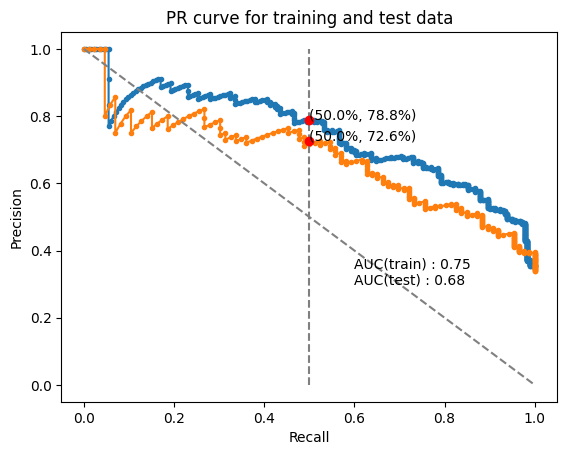

In [ ]:
# compare PR curve on train vs test data
pyplot.plot(dict_eval['train']['recall'], dict_eval['train']['prec'],
            marker='.', label='Train set')
pyplot.plot(dict_eval['test']['recall'], dict_eval['test']['prec'],
            marker='.', label='Test set')

# y=x line.
pyplot.plot([0,1], [1,0], linestyle='--', color='grey' )

# Highest precision for recall >= 50%
recall_thresh = 0.5
pyplot.plot([recall_thresh,recall_thresh], [0,1], linestyle='--', color='grey' )
anno_list = {}

for dset in ['train', 'test']:
  # find highest TPR for 20% FPR
  max_prec = max(dict_eval[dset]['prec'][dict_eval[dset]['recall'] >= recall_thresh])
  pyplot.plot([recall_thresh], [max_prec], marker = 'o',color='red' )
  anno_str = "(" + str(np.round(recall_thresh*100, 0)) + \
            "%, " + \
            str(np.round(max_prec*100 ,1)) + \
            "%)"
  pyplot.text(recall_thresh, max_prec, anno_str)

  # Report AUC score
  auc_str = str(np.round(dict_eval[dset]['pr_auc'], 2))
  anno_list[dset] = "AUC("+ dset +") : " + auc_str

auc_str = anno_list['train'] + "\n" + anno_list['test']
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('PR curve for training and test data')

# What we have not covered
* How to handle missing data
* How to handle categorical variables.
* Data scaling
* Error analysis

#References

* https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
* [ROC Curves and Precision-Recall Curves for Imbalanced Classification](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/)




In [ ]:
# Read data using upload from local machine
# Click on files icon (picture of folder) on the left panel
# Click on file upload icon (top panel, leftmost icon)
# using this upload file from your machine
# Read the file into memory using the code below
# Note that this file will get deleted once you close the notebook
import pandas as pd
dat = pd.read_csv("iris.csv")

In [ ]:
dat.sample(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
20,5.4,3.4,1.7,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
111,6.4,2.7,5.3,1.9,Virginica
